In [85]:
import numpy as np
import seaborn as sea 
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.linear_model import Perceptron
from sklearn.datasets     import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [86]:
from matplotlib.colors import ListedColormap
def plotDecisionRegion(X,y,classifier,resolution=0.02):
    marks = ('o','s','^','v','<')
    color = ('red','blue','lightgreen','gray','cyan')

    cmap  = ListedColormap(colors=color[:len(np.unique(y))])

    x1Min, x1Max = X[:,0].min() - 1, X[:,0].max() + 1 
    x2Min, x2Max = X[:,1].min() - 1, X[:,1].max() + 1

    xx1, xx2 = np.meshgrid(
        np.arange(x1Min,x1Max,resolution),
        np.arange(x2Min,x2Max,resolution)
    ) 
    x = np.array([xx1.ravel(),xx2.ravel()])
    lab = classifier.predict(x.T)

    lab = lab.reshape(xx1.shape)

    plt.contourf(xx1,xx2,lab,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[ y == cl,0 ],y=X[ y == cl,1 ] , alpha=0.8,c=color[idx],marker=marks[idx],edgecolors='black')
    
    plt.legend(np.unique(y))
    plt.show()

&nbsp;

## Perceptron

In [87]:
X, y = make_classification(n_features=4,n_samples=1000,scale=1000)

X = StandardScaler().fit_transform(X)

In [88]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2,random_state=42)

In [89]:
percept = Perceptron(penalty=None,verbose=10,warm_start=True)
percept.fit(xtrain,ytrain,coef_init=np.array([0.2,1.1,10,9]),intercept_init=100)

-- Epoch 1
Norm: 23.67, NNZs: 4, Bias: 2.000000, T: 800, Avg. loss: 6.372282
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 11.90, NNZs: 4, Bias: 0.000000, T: 1600, Avg. loss: 0.590018
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 11.25, NNZs: 4, Bias: 0.000000, T: 2400, Avg. loss: 0.387823
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 11.10, NNZs: 4, Bias: 0.000000, T: 3200, Avg. loss: 0.354120
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 11.08, NNZs: 4, Bias: 0.000000, T: 4000, Avg. loss: 0.407746
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 10.71, NNZs: 4, Bias: 0.000000, T: 4800, Avg. loss: 0.370506
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 11.08, NNZs: 4, Bias: -1.000000, T: 5600, Avg. loss: 0.354423
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 11.02, NNZs: 4, Bias: 0.000000, T: 6400, Avg. loss: 0.375310
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 10.84, NNZs: 4, Bias: 0.000000, T: 7200, Avg. loss: 0.336137
Total training tim

Perceptron(verbose=10, warm_start=True)

In [90]:
percept.coef_,percept.intercept_

(array([[ 8.76796938, -0.84334518,  1.84262094,  6.51565154]]), array([0.]))

In [91]:
pred = percept.predict(xtest)

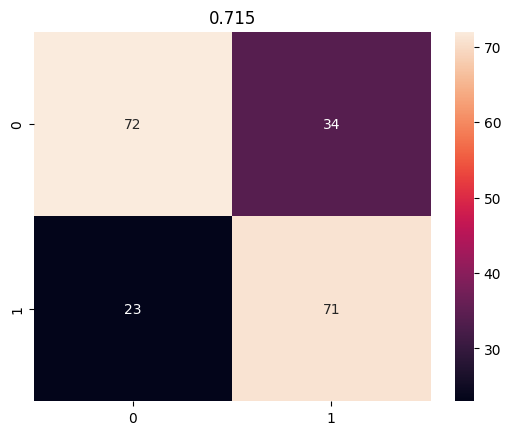

In [92]:
sea.heatmap(confusion_matrix(ytest,pred),annot=True,fmt='')
plt.title(accuracy_score(ytest,pred))
plt.show()

In [96]:
xtrain, xtest, ytrain, ytest = train_test_split(X[:,[0,1]],y,test_size=0.2,random_state=42)

In [97]:
perceptro = Perceptron(penalty=None)
perceptro.fit(xtrain,ytrain)

Perceptron()

In [102]:
perceptro.score(xtest,ytest)

0.88

In [103]:
perceptro.coef_

array([[2.07273002, 0.93982121]])

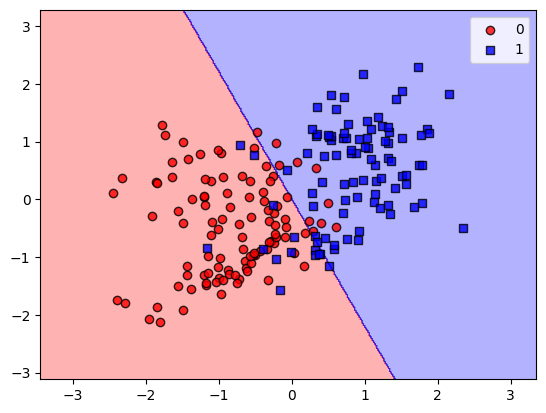

In [105]:
plotDecisionRegion(xtest,ytest,perceptro)